# Calculate MUR25 Sea Surface Temperature Global Mean

This notebook demonstrates how we calculate the area-weighted global mean sea surface temperature (SST) from the MUR25 L4 dataset. 

You can run this on a local computer by downloading the data using the following command in your terminal:
    
    podaac-data-downloader -c MUR25-JPL-L4-GLOB-v04.2 -d ./data/MUR25-JPL-L4-GLOB-v04.2 --start-date 2022-12-01T00:00:00Z --end-date 2022-12-31T23:00:00Z

### Load required libraries and prepare data

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import date

In [70]:
ds = xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221201090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst = ds.analysed_sst
sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 720, lon: 1440)>
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-12-01T09:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                "Final" version using Multi-Resolution Variationa...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

-89.875 -179.875
{'time': numpy.datetime64('2022-12-01T09:00:00.000000000'), 'lat': -89.875, 'lon': -179.875, 'sst': array(nan, dtype=float32)}


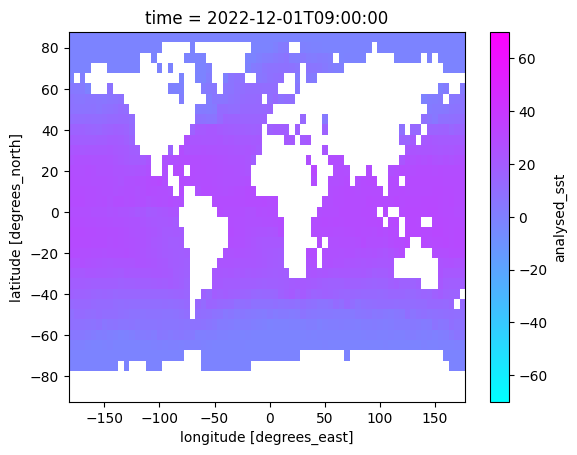

In [101]:
ds = xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221201090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst = ds.analysed_sst

# convert to degrees Celcius
sst = sst - 273.15

# only select every 100th point
sst = sst[0, ::20, ::20]

db_items = {}

for lat in sst.lat.values:
    for lon in sst.lon.values:
        
        db_entry = {
            "time": sst.time.values,
            "lat": lat,
            "lon": lon,
            "sst": sst.loc[dict(lat=lat, lon=lon)].values
        }

        db_items[sst.time.values] = db_entry

# plot the data
p = sst.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)


### Analyze second granule - December 10

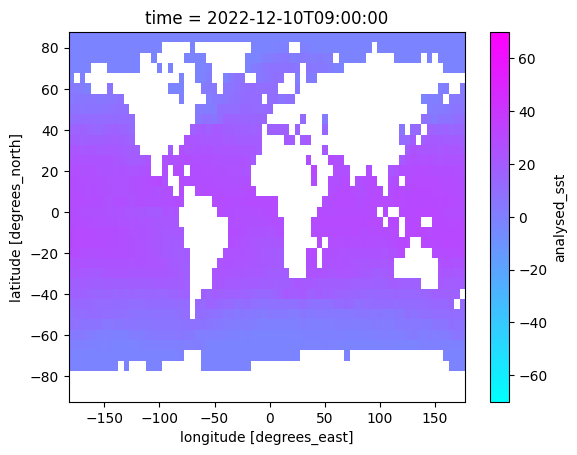

In [57]:
ds2= xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221210090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst2 = ds2.analysed_sst

# convert to degrees Celcius
sst2 = sst2 - 273.15

# only select every 100th point
sst2 = sst2[0, ::20, ::20]


# plot the data
p2 = sst2.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)


### Analyze 3rd granule - Dec 20

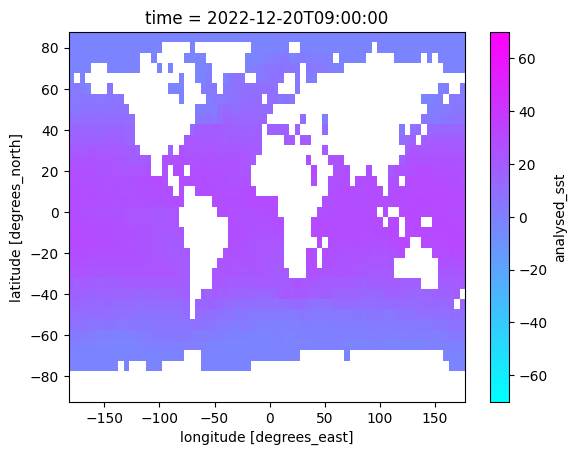

In [58]:
ds3= xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221220090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst3 = ds3.analysed_sst

# convert to degrees Celcius
sst3 = sst3 - 273.15

# only select every 100th point
sst3 = sst3[0, ::20, ::20]


# plot the data
p3 = sst3.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

### Calculate Statistics

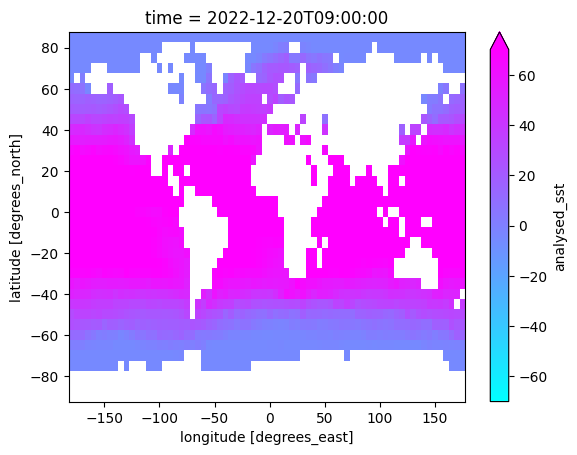

In [64]:
pixel_sum = sst + sst2 + sst3

plot_sum = pixel_sum.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

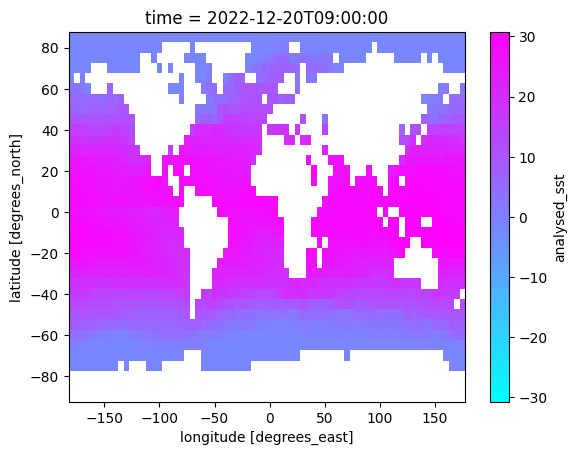

In [65]:
pixel_mean = (sst + sst2 + sst3)/3

pixel_mean.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

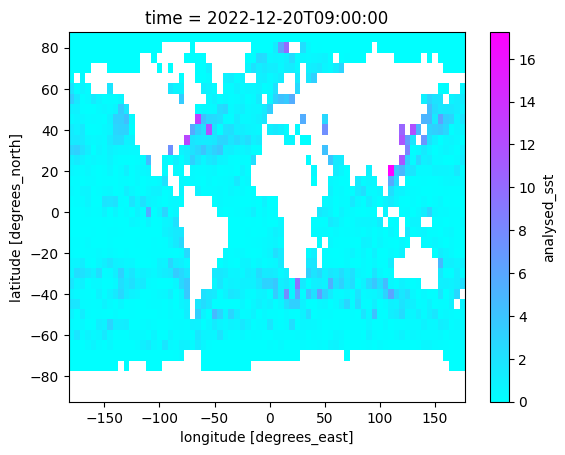

In [66]:
# sum of squares
pixel_sum_squares = (sst-pixel_mean)**2 + (sst2-pixel_mean)**2 + (sst3-pixel_mean)**2

plot_sum_sq = pixel_sum_squares.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

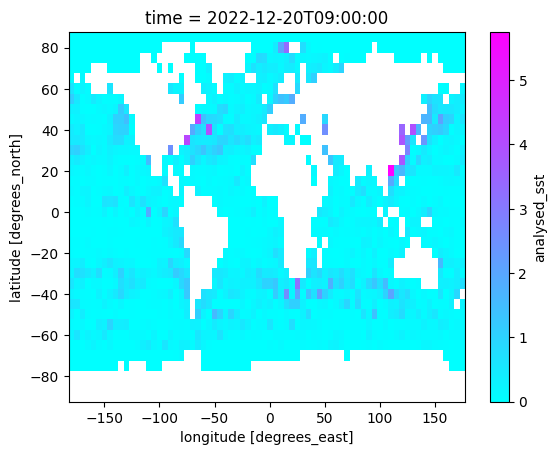

In [72]:
# Variance
pixel_variance = pixel_sum_squares/3

plot_variance = pixel_variance.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

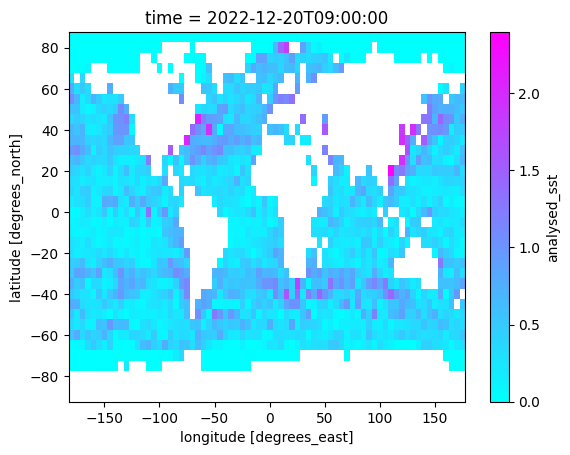

In [69]:
# standard deviation
pixel_sd = np.sqrt(pixel_variance)

plot_sd = pixel_sd.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)